## Análise Exploratória

In [4]:
# Importamos as bibliotecas
import pandas as pd

# Informar ao matplotlib para imprimir os gráficos inline
%matplotlib inline

In [5]:
# Importamos apenas algumas colunas do arquivo
# colunas: 3 - Hospital, 6 - Município, 7 - Complexidade, 8 - Carater Atendimento
# 12 - Sub Grupo Procedimento, 14 - Procedimento
df = pd.read_csv('sih-janeiro-2017-cirurgias-eletiva-e-emergencia.csv', sep=';', 
                 encoding='cp1252', usecols=[3,6,7,8,12,14])

# Troco o nome das colunas
df.columns = ['Hospital', 'Municipio', 'Complexidade', 'Carater', 'Sub Grupo Procedimento', 'Procedimento']

In [6]:
# Exibir as 3 primeiras linhas - por padrão o head mostra as 5 primeiras linhas
df.head(3)

,Hospital,Municipio,Complexidade,Carater,Sub Grupo Procedimento,Procedimento
0,6876617 HOSPITAL DA CRIANCA DE BRASILIA JOSE A...,"BRASILIA, DF, BR",Média complexidade,Eletivo,Sub Grupo: 15 - Outras cirurgias,TRATAMENTO C/ CIRURGIAS MULTIPLAS
1,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 03 - Cirurgia do sistema nervoso ce...,DERIVACAO VENTRICULAR EXTERNAR-SUBGALEAL EXTERNA
2,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 15 - Outras cirurgias,TRATAMENTO C/ CIRURGIAS MULTIPLAS


In [7]:
# Verifico quantas linhas/Procedimentos existem
df.count()

Hospital                  4862
Municipio                 4862
Complexidade              4862
Carater                   4862
Sub Grupo Procedimento    4862
Procedimento              4862
dtype: int64

In [8]:
# Descrevo as colunas numéricas
df.describe()

,Hospital,Municipio,Complexidade,Carater,Sub Grupo Procedimento,Procedimento
count,4862,4862,4862,4862,4862,4862
unique,16,11,2,4,16,495
top,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 11 - Cirurgia obstétrica,PARTO CESARIANO
freq,735,1923,4353,3794,1539,1060


In [9]:
# Listar os hospitais presentes nos dados
# Unique traz os valores únicos
df['Hospital'].unique()

array(['6876617 HOSPITAL DA CRIANCA DE BRASILIA JOSE ALENCAR HCB',
       '0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL',
       '0010499 HRT HOSPITAL REGIONAL DE TAGUATINGA', '0010545 HRBZ',
       '0010480 HOSPITAL REGIONAL DE CEILANDIA',
       '3276678 INSTITUTO DE CARDIOLOGIA DO DISTRITO FEDERAL',
       '0010472 HRG', '0010510 HOSPITAL UNIVERSITARIO DE BRASILIA',
       '0010529 HRPL',
       '0010537 HOSPITAL MATERNO INFANTIL DE BRASILIA HMIB',
       '3055450 CBV CENTRO BRASILEIRO DA VISAO',
       '2672197 HRSAM HOSPITAL REGIONAL DE SAMAMBAIA', '0010502 HRS',
       '5717515 HRSM', '2645157 HRPA', '0010464 HRAN'], dtype=object)

In [10]:
# Quantas cirurgias foram realizadas em cada hospital - quantas vezes o Hospital se repetiu no arquivo
df['Hospital'].value_counts()

0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL           735
0010472 HRG                                                 555
0010480 HOSPITAL REGIONAL DE CEILANDIA                      461
0010464 HRAN                                                432
0010499 HRT HOSPITAL REGIONAL DE TAGUATINGA                 373
0010510 HOSPITAL UNIVERSITARIO DE BRASILIA                  350
2645157 HRPA                                                327
0010537 HOSPITAL MATERNO INFANTIL DE BRASILIA HMIB          298
5717515 HRSM                                                281
0010529 HRPL                                                256
0010502 HRS                                                 225
2672197 HRSAM HOSPITAL REGIONAL DE SAMAMBAIA                195
3276678 INSTITUTO DE CARDIOLOGIA DO DISTRITO FEDERAL        191
0010545 HRBZ                                                 75
6876617 HOSPITAL DA CRIANCA DE BRASILIA JOSE ALENCAR HCB     74
3055450 CBV CENTRO BRASILEIRO DA VISAO  

In [11]:
# Quantas cirurgias por Sub Grupo Procedimento
df['Sub Grupo Procedimento'].value_counts()

Sub Grupo: 11 - Cirurgia obstétrica                                                   1539
Sub Grupo: 07 - Cirurgia do aparelho digestivo, orgãos anexos e parede abdominal       893
Sub Grupo: 08 - Cirurgia do sistema osteomuscular                                      651
Sub Grupo: 09 - Cirurgia do aparelho geniturinário                                     474
Sub Grupo: 06 - Cirurgia do aparelho circulatório                                      299
Sub Grupo: 15 - Outras cirurgias                                                       223
Sub Grupo: 04 - Cirurgia das vias aéreas superiores, da cabeça e do pescoço            145
Sub Grupo: 03 - Cirurgia do sistema nervoso central e periférico                       141
Sub Grupo: 16 - Cirurgia em oncologia                                                  110
Sub Grupo: 05 - Cirurgia do aparelho da visão                                           98
Sub Grupo: 12 - Cirurgia torácica                                                       92

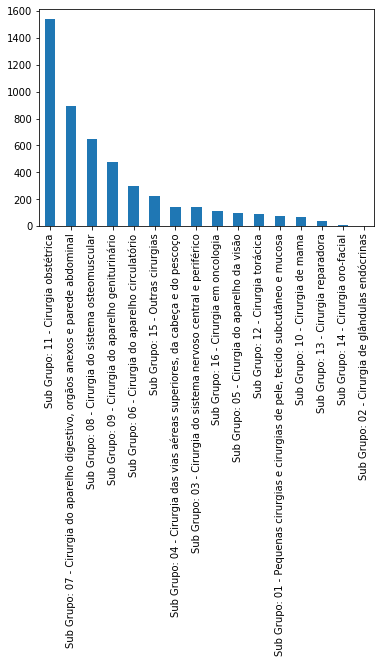

In [12]:
# Plotar o gráfico por Sub Grupo Procedimento
df['Sub Grupo Procedimento'].value_counts().plot.bar()

In [13]:
# Criamos um sub conjunto dos dados originais
# Vamos criar o conjunto apenas com o Hospital que mais teve procedimentos, neste caso é o hospital de base
df_hospbase = df[df['Hospital'] == '0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL' ]

# Linhas iniciais
df_hospbase.head(2)

,Hospital,Municipio,Complexidade,Carater,Sub Grupo Procedimento,Procedimento
1,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 03 - Cirurgia do sistema nervoso ce...,DERIVACAO VENTRICULAR EXTERNAR-SUBGALEAL EXTERNA
2,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 15 - Outras cirurgias,TRATAMENTO C/ CIRURGIAS MULTIPLAS


In [14]:
# Linhas finais
df_hospbase.tail(2)

,Hospital,Municipio,Complexidade,Carater,Sub Grupo Procedimento,Procedimento
2372,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Alta complexidade,Eletivo,Sub Grupo: 16 - Cirurgia em oncologia,SEGMENTECTOMIA/QUADRANTECTOMIA/SETORECTOMIA DE...
2373,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Alta complexidade,Eletivo,Sub Grupo: 06 - Cirurgia do aparelho circulatório,ESTUDO ELETROFISIOLOGICO TERAPEUTICO II (ABLAC...


In [26]:
# O Sample mostra algumas linhas aleatórias do arquivo
df_hospbase.sample(5)

,Hospital,Municipio,Complexidade,Carater,Sub Grupo Procedimento,Procedimento
115,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 09 - Cirurgia do aparelho geniturin...,ORQUIDOPEXIA BILATERAL
2077,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 06 - Cirurgia do aparelho circulatório,EMBOLECTOMIA ARTERIAL
35,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 08 - Cirurgia do sistema osteomuscular,REDUCAO INCRUENTA DE FRATURA / LUXACAO / FRATU...
1616,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Alta complexidade,Urgência,Sub Grupo: 16 - Cirurgia em oncologia,SEGMENTECTOMIA/QUADRANTECTOMIA/SETORECTOMIA DE...
2016,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Outros tipos lesões/envenenamentos por agentes...,Sub Grupo: 12 - Cirurgia torácica,TORACOSTOMIA COM DRENAGEM PLEURAL FECHADA


In [29]:
# Verificar a quantidade de procedimentos realizados no hospital de base
df_hospbase['Procedimento'].value_counts()

TRATAMENTO C/ CIRURGIAS MULTIPLAS                                               47
TRAQUEOSTOMIA                                                                   28
DERIVACAO VENTRICULAR PARA PERITONEO / ATRIO / PLEURA / RAQUE                   26
TORACOSTOMIA COM DRENAGEM PLEURAL FECHADA                                       23
IMPLANTE DE MARCAPASSO DE CAMARA DUPLA TRANSVENOSO                              21
                                                                                ..
ESTUDO ELETROFISIOLOGICO TERAPEUTICO II (ABLACAO DE VIAS ANOMALAS ESQUERDAS)     1
TRATAMENTO CIRÚRGICO DE FÍSTULA CUTÂNEA DE ORIGEM DENTÁRIA                       1
TROCA DE GERADOR DE MARCAPASSO DE CAMARA UNICA                                   1
DESCORTICAÇÃO PULMONAR                                                           1
RECONSTRUÇÃO DE POLIA TENDINOSA DOS DEDOS DA MÃO                                 1
Name: Procedimento, Length: 242, dtype: int64

In [33]:
# Contar o número de procedimentos relacionados com amputação
df_hospbase[df_hospbase['Procedimento'].str.contains('AMPUTA')].count()

Hospital                  33
Municipio                 33
Complexidade              33
Carater                   33
Sub Grupo Procedimento    33
Procedimento              33
dtype: int64

In [50]:
# Dividir o dataFrame original apenas com os Procedimentos de parto
df_parto = df[df['Procedimento'].str.contains('PARTO')]

# Verifico as 3 primeiras linhas do arquivo
df_parto.head(3)

,Hospital,Municipio,Complexidade,Carater,Sub Grupo Procedimento,Procedimento
130,0010545 HRBZ,"BRAZLANDIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 11 - Cirurgia obstétrica,PARTO CESARIANO
131,0010545 HRBZ,"BRAZLANDIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 11 - Cirurgia obstétrica,PARTO CESARIANO
132,0010545 HRBZ,"BRAZLANDIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 11 - Cirurgia obstétrica,PARTO CESARIANO


In [51]:
# Verifico as 3 últimas linhas do arquivo
df_parto.tail(3)

,Hospital,Municipio,Complexidade,Carater,Sub Grupo Procedimento,Procedimento
4848,0010480 HOSPITAL REGIONAL DE CEILANDIA,"CEILANDIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 11 - Cirurgia obstétrica,PARTO CESARIANO
4849,0010480 HOSPITAL REGIONAL DE CEILANDIA,"CEILANDIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 11 - Cirurgia obstétrica,PARTO CESARIANO
4850,0010480 HOSPITAL REGIONAL DE CEILANDIA,"CEILANDIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 11 - Cirurgia obstétrica,PARTO CESARIANO


In [52]:
# Verifico quantos procedimentos de parto existem nos dados
df_parto.count()

Hospital                  1316
Municipio                 1316
Complexidade              1316
Carater                   1316
Sub Grupo Procedimento    1316
Procedimento              1316
dtype: int64

In [53]:
# Verificar a quantidade de partos por tipo de parto
df_parto['Procedimento'].value_counts()

PARTO CESARIANO                                                         1060
PARTO CESARIANO EM GESTACAO DE ALTO RISCO                                166
SUTURA DE LACERACOES DE TRAJETO PELVICO (NO PARTO ANTES DA ADMISSAO)      56
PARTO CESARIANO C/ LAQUEADURA TUBARIA                                     34
Name: Procedimento, dtype: int64

In [54]:
# Verifico a quantidade de partos por hospital
df_parto['Hospital'].value_counts()

0010472 HRG                                           184
0010480 HOSPITAL REGIONAL DE CEILANDIA                169
0010537 HOSPITAL MATERNO INFANTIL DE BRASILIA HMIB    135
2645157 HRPA                                          124
5717515 HRSM                                          110
0010464 HRAN                                          104
0010502 HRS                                           103
0010510 HOSPITAL UNIVERSITARIO DE BRASILIA             99
2672197 HRSAM HOSPITAL REGIONAL DE SAMAMBAIA           94
0010529 HRPL                                           84
0010499 HRT HOSPITAL REGIONAL DE TAGUATINGA            76
0010545 HRBZ                                           34
Name: Hospital, dtype: int64

In [55]:
# Ver a quantidade de partos por Carater de Atendimento
df_parto['Carater'].value_counts()

Urgência    1293
Eletivo       23
Name: Carater, dtype: int64

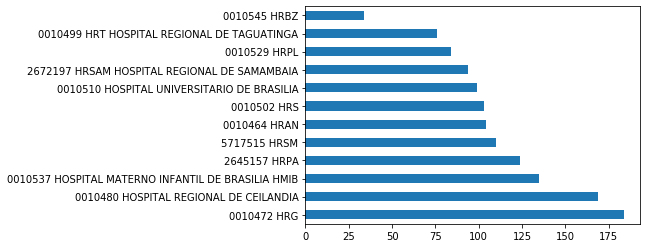

In [56]:
# PLotar um gráfico de barras horizontal com o número de partos cesarianos por hospital
df_parto['Hospital'].value_counts().plot.barh()

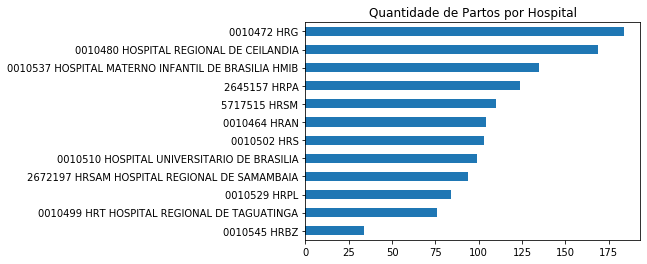

In [58]:
# Melhorar o gráfico de barras
# Inverter a ordem e informar um título
# ascending=True - é o parâmetro que informa para o vale_counts para ordenar os dados de forma ascendente 
# title - parâmetro que informa um título para o gráfico
df_parto['Hospital'].value_counts(ascending=True).plot.barh(title='Quantidade de Partos por Hospital')